Урок 8. Работа с данными


In [894]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python

2. Загрузите датасет в pandas DataFrame под названием df.

In [895]:
# Загрузка датасета "House Prices - Advanced Regression Techniques"
df = pd.read_csv('train.csv')

In [896]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Выполните предварительную обработку данных, выполнив следующие шаги:

- a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

In [897]:
# Проверка того, в каких столбцах отсутствуют значения
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [898]:
df['LotFrontage'] = df['LotFrontage'].replace('NA', np.nan).replace('', np.nan) # текс NA на NaN
df['LotFrontage'] = df['LotFrontage'].astype(float)
mean_value = round(df['LotFrontage'].mean(), 2) # округление до сотых
df['LotFrontage'] = df['LotFrontage'].fillna(mean_value)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(object)
df['MasVnrArea'] = df['MasVnrArea'].astype(object)


In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

числовые колонки заменим на средние

In [900]:
numeric_cols = df.select_dtypes(include=[np.int64, np.float64]) # выбор числовых колонок
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean) # замена пропущенных значений на среднее
df[numeric_cols.columns]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Замена категориальных колонок на моду

In [901]:
categoria_cols = df.select_dtypes(include=['object']) # выбор категориальных колонок
df[categoria_cols.columns] = categoria_cols.fillna(categoria_cols.mode().iloc[0]) 
df[categoria_cols.columns]

C:\Users\Serg\AppData\Local\Temp\ipykernel_12872\1686658907.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categoria_cols.columns] = categoria_cols.fillna(categoria_cols.mode().iloc[0])


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999.0,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978.0,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941.0,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950.0,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [902]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [903]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- b. Проверьте и обработайте любые дублирующиеся строки в датасете.


In [904]:
duplicates = df.duplicated()
duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

Дублей нет

In [905]:
df = df.drop_duplicates()

- c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы?

In [907]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

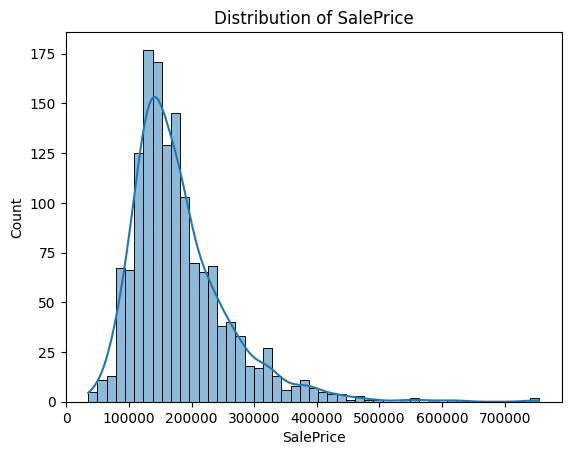

In [908]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [909]:
# Вычисление Z-score для столбца "SalePrice"
z = np.abs(stats.zscore(df['SalePrice']))

# Установка порогового значения Z-score
threshold = 3

# Выявление выбросов на основе Z-score
outliers = df['SalePrice'][z > threshold]
outliers

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64

In [910]:
# обнаружение и обработка выбросов
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number))) # z оценки для числовых переменных
df = df[(z_scores<3).all(axis=1)] # удаление строк с выбросами

In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 0 to 1456
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1015 non-null   int64  
 1   MSSubClass     1015 non-null   int64  
 2   MSZoning       1015 non-null   object 
 3   LotFrontage    1015 non-null   float64
 4   LotArea        1015 non-null   int64  
 5   Street         1015 non-null   object 
 6   Alley          1015 non-null   object 
 7   LotShape       1015 non-null   object 
 8   LandContour    1015 non-null   object 
 9   Utilities      1015 non-null   object 
 10  LotConfig      1015 non-null   object 
 11  LandSlope      1015 non-null   object 
 12  Neighborhood   1015 non-null   object 
 13  Condition1     1015 non-null   object 
 14  Condition2     1015 non-null   object 
 15  BldgType       1015 non-null   object 
 16  HouseStyle     1015 non-null   object 
 17  OverallQual    1015 non-null   int64  
 18  OverallCond  

 b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

In [912]:
# выбираем числовые столбцы
numeric_df = df.select_dtypes(include=[float, int])
# Вычислим корреляционную матрицу
corr = numeric_df.corr()
# Отсортируем значения корреляции по 'SalePrice'
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.813903
GrLivArea        0.757007
GarageCars       0.697028
GarageArea       0.670352
FullBath         0.669794
YearBuilt        0.632075
TotalBsmtSF      0.627239
TotRmsAbvGrd     0.594391
1stFlrSF         0.593348
YearRemodAdd     0.566916
GarageYrBlt      0.485754
Fireplaces       0.436872
MasVnrArea       0.415562
OpenPorchSF      0.391954
LotFrontage      0.386450
LotArea          0.364850
BsmtFinSF1       0.350999
WoodDeckSF       0.330729
2ndFlrSF         0.318098
BedroomAbvGr     0.276780
HalfBath         0.268377
BsmtFullBath     0.231293
BsmtUnfSF        0.219351
MoSold           0.088510
ScreenPorch      0.017633
3SsnPorch       -0.001348
LowQualFinSF    -0.020850
Id              -0.024314
YrSold          -0.026457
MSSubClass      -0.037097
MiscVal         -0.070746
BsmtFinSF2      -0.098253
OverallCond     -0.158932
EnclosedPorch   -0.205026
BsmtHalfBath          NaN
KitchenAbvGr          NaN
PoolArea              NaN
Name: SalePr

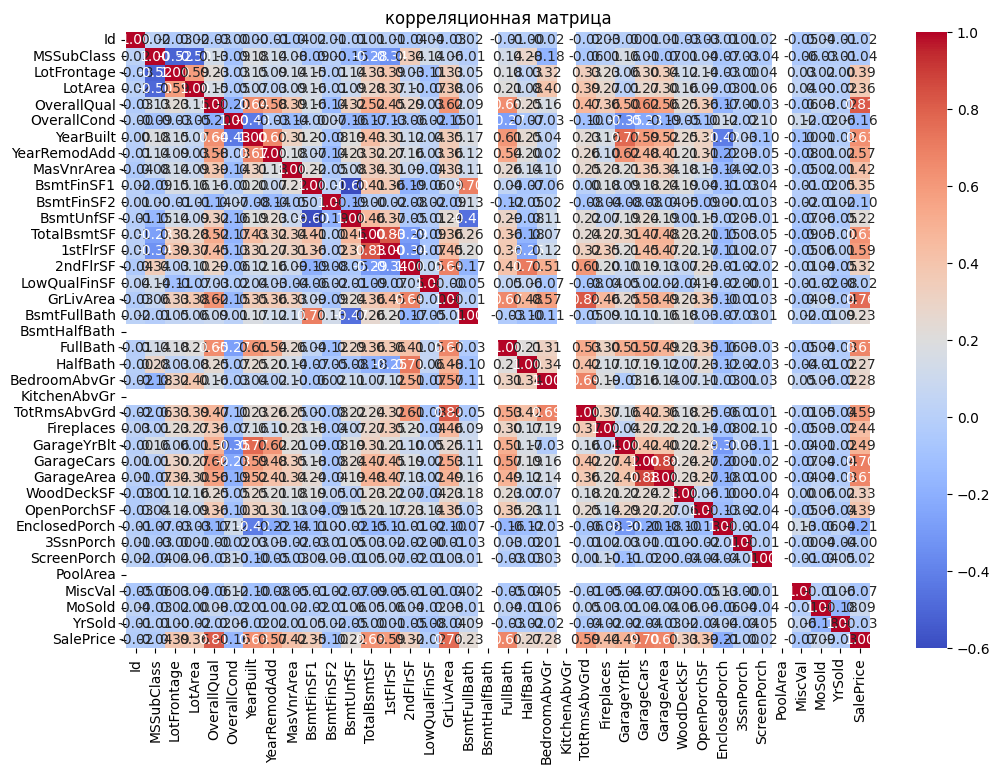

In [913]:

# построим тепловую карту корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('корреляционная матрица')
plt.show()

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

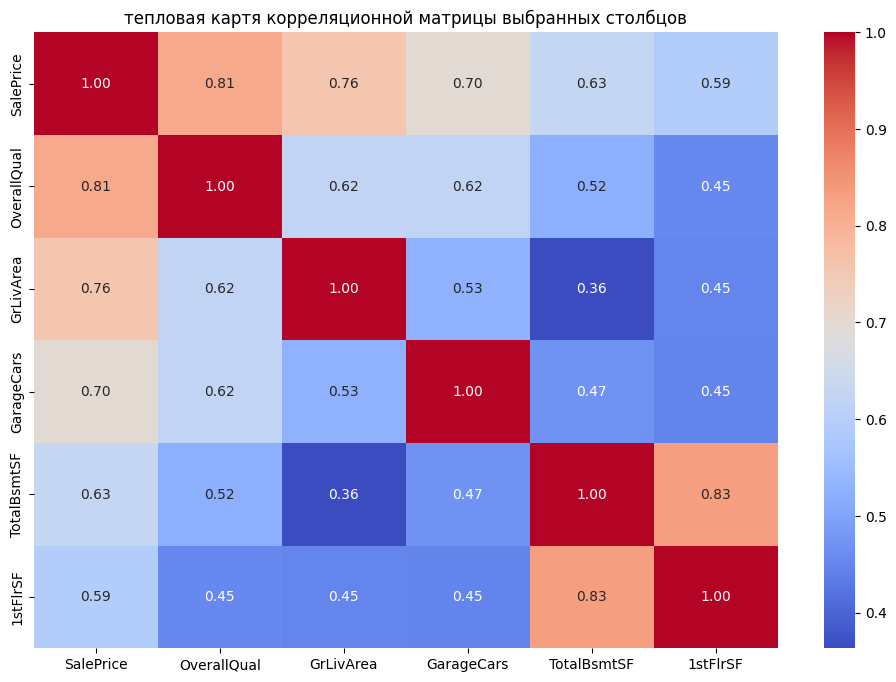

In [914]:
# выбираем числовые столбцы
selected_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

# Вычислим корреляционную матрицу
corr = df[selected_columns].corr()

# построим тепловую карту корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('тепловая картя корреляционной матрицы выбранных столбцов')
plt.show()

In [915]:
variables = ['OverallQual', 'GrLivArea', 'GarageCars']
df[variables].describe()

,OverallQual,GrLivArea,GarageCars
count,1015.000000,1015.000000,1015.000000
mean,6.072906,1422.796059,1.749754
std,1.314689,429.403578,0.709500
min,2.000000,438.000000,0.000000
25%,5.000000,1092.000000,1.000000
50%,6.000000,1392.000000,2.000000
75%,7.000000,1689.500000,2.000000
max,10.000000,2978.000000,4.000000


d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

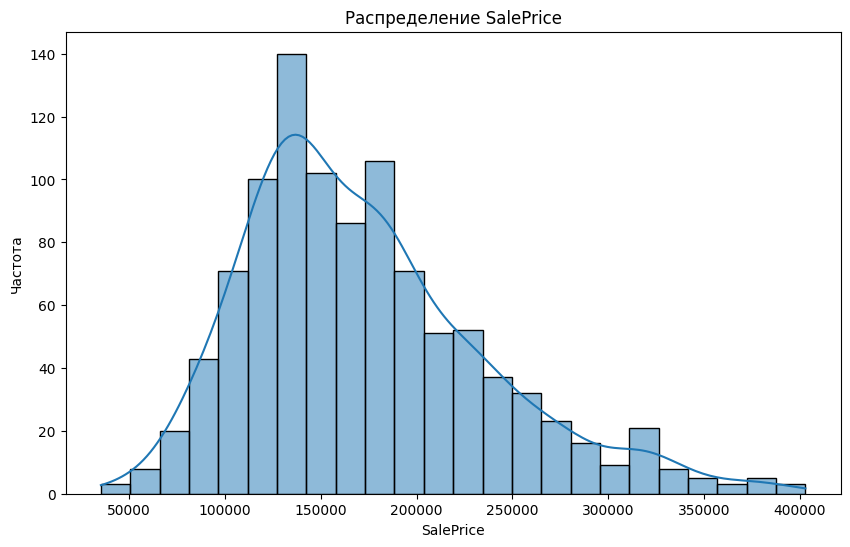

In [916]:
# Гистограмма для SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

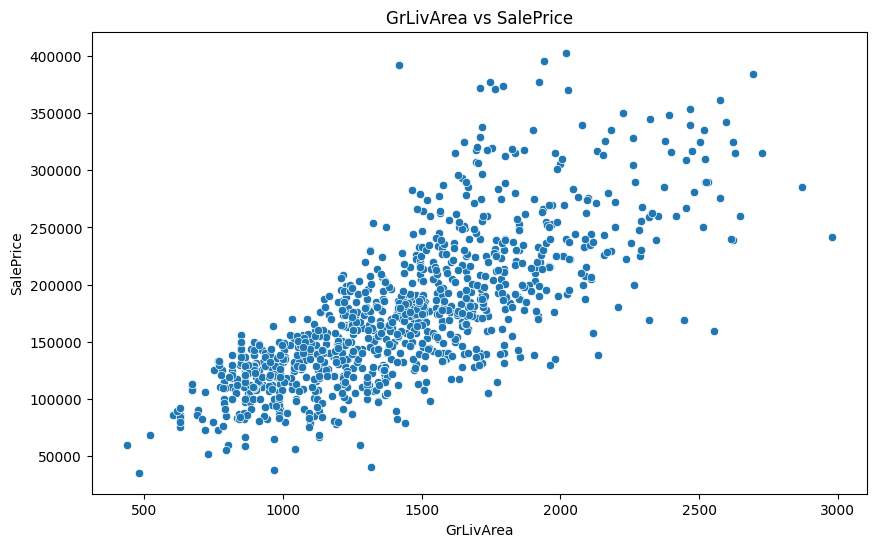

In [917]:
# Диаграмма рассеяния GrLivArea и SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

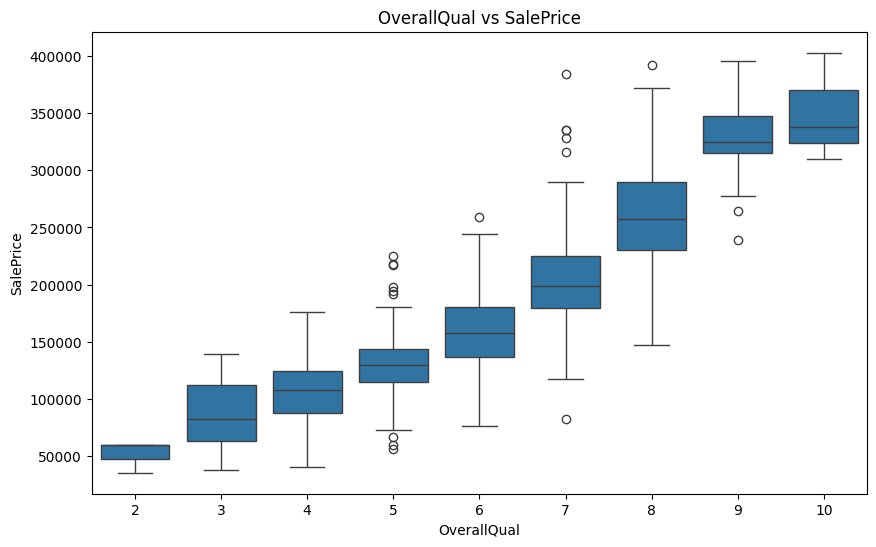

In [918]:
# Ящик с усами для OverallQual и SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. 

In [919]:
df_standardized = df.copy() 
df_standardized = pd.get_dummies(df_standardized, drop_first=True)

In [920]:

# Label Encoding для переменной 'Neighborhood'
label_encoder = LabelEncoder()
df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.


In [921]:
# Общая площадь = общая площадь подвала + площадь первого этажа + площадь второго этажа
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [922]:
# Возраст дома на момент продажи
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [923]:
# Время с момента последнего ремонта
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

In [924]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,RemodAge
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,2,2008,WD,Normal,208500,2566,5,5
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,9,2008,WD,Normal,223500,2706,7,6
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,12,2008,WD,Normal,250000,3343,8,8
6,7,20,RL,75.0,10084,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,8,2007,WD,Normal,307000,3380,3,2
10,11,20,RL,70.0,11200,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,2,2008,WD,Normal,129500,2080,43,43


Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [925]:
df.to_csv('cleaned_house_prices.csv', index=False)
